In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

# Preprocessing - Stage 1

In [37]:
df = pd.read_csv('datasets/cair_cvd_2025_dataset.csv')
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [38]:
df.shape

(1529, 22)

In [39]:
numeric_dtypes = df.select_dtypes(include='number')
object_dtypes = df.select_dtypes(include='object')

print(f'features(numeric) : {numeric_dtypes.columns}\n')
print(f'features(object) : {object_dtypes.columns}')

features(numeric) : Index(['Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)',
       'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)',
       'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

features(object) : Index(['Sex', 'Blood Pressure (mmHg)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Blood Pressure Category'],
      dtype='object')


In [40]:
# Blood pressure splited into SBP (Systolic) and DBP(Diastolic)
df[['SBP', 'DBP']] = df['Blood Pressure (mmHg)'].str.split('/', expand=True)
df['SBP'] = df['SBP'].astype(int)
df['DBP'] = df['DBP'].astype(int)

In [41]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,SBP,DBP
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,125,79
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,139,70
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64,104,77
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,140,83
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,144,83


In [42]:
df.drop(['Blood Pressure (mmHg)'], axis=1, inplace=True)

In [43]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,SBP,DBP
0,F,32.0,69.1,1.71,23.6,86.2,248.0,78.0,111.0,N,...,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,125,79
1,F,55.0,118.7,1.69,41.6,82.5,162.0,50.0,135.0,Y,...,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,139,70
2,M,NaN,NaN,1.83,26.9,106.7,103.0,73.0,114.0,N,...,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64,104,77
3,M,44.0,108.3,1.80,33.4,96.6,134.0,46.0,91.0,N,...,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,140,83
4,F,32.0,99.5,1.86,28.8,102.7,146.0,64.0,141.0,Y,...,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,144,83


In [44]:
numeric_dtypes.isnull().sum()

Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64

In [45]:
object_dtypes.isnull().sum()

Sex                        0
Blood Pressure (mmHg)      0
Smoking Status             0
Diabetes Status            0
Physical Activity Level    0
Family History of CVD      0
CVD Risk Level             0
Blood Pressure Category    0
dtype: int64

In [46]:
# A function that replace null/nan values by median values
def clean_missing_value(df):
    for col in numeric_dtypes.columns:
        means_numeric_features = df[col].median()
        df[col] = df[col].fillna(means_numeric_features)
    return df


In [47]:
clean_missing_value(df)
df.isnull().sum()

Sex                             0
Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
CVD Risk Level                  0
Height (cm)                     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
SBP                             0
DBP                             0
dtype: int64

In [48]:
correlations_of_features = numeric_dtypes.corr()
correlations_of_features

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
Age,1.000000,0.018772,0.032374,0.021978,0.074508,0.003215,0.036189,0.104019,0.030656,0.061254,0.092224,0.060314,-0.009122,0.054297
Weight (kg),0.018772,1.000000,0.011726,0.645261,0.043751,0.010221,-0.003709,0.040298,0.012616,0.018778,0.009807,0.002524,0.007230,0.397542
Height (m),0.032374,0.011726,1.000000,-0.164456,0.020897,0.000976,-0.000661,0.021967,0.999999,-0.422906,0.021865,0.012660,0.001518,-0.085316
BMI,0.021978,0.645261,-0.164456,1.000000,0.031422,0.019467,-0.008854,0.039136,-0.174665,0.096286,0.020724,0.023819,0.012521,0.616447
Abdominal Circumference (cm),0.074508,0.043751,0.020897,0.031422,1.000000,0.063085,-0.001065,0.029641,0.018561,0.902775,0.073420,0.040908,0.050242,0.086472
Total Cholesterol (mg/dL),0.003215,0.010221,0.000976,0.019467,0.063085,1.000000,0.058685,0.010712,0.003292,0.048410,0.043958,0.054043,0.962567,0.509151
HDL (mg/dL),0.036189,-0.003709,-0.000661,-0.008854,-0.001065,0.058685,1.000000,0.062371,0.007730,0.014840,0.076026,0.035542,-0.206197,0.047179
Fasting Blood Sugar (mg/dL),0.104019,0.040298,0.021967,0.039136,0.029641,0.010712,0.062371,1.000000,0.021294,0.032002,0.084079,0.086381,0.004133,0.076589
Height (cm),0.030656,0.012616,0.999999,-0.174665,0.018561,0.003292,0.007730,0.021294,1.000000,-0.418214,0.026961,0.015362,0.003689,-0.088247
Waist-to-Height Ratio,0.061254,0.018778,-0.422906,0.096286,0.902775,0.048410,0.014840,0.032002,-0.418214,1.000000,0.067700,0.038665,0.035348,0.115090


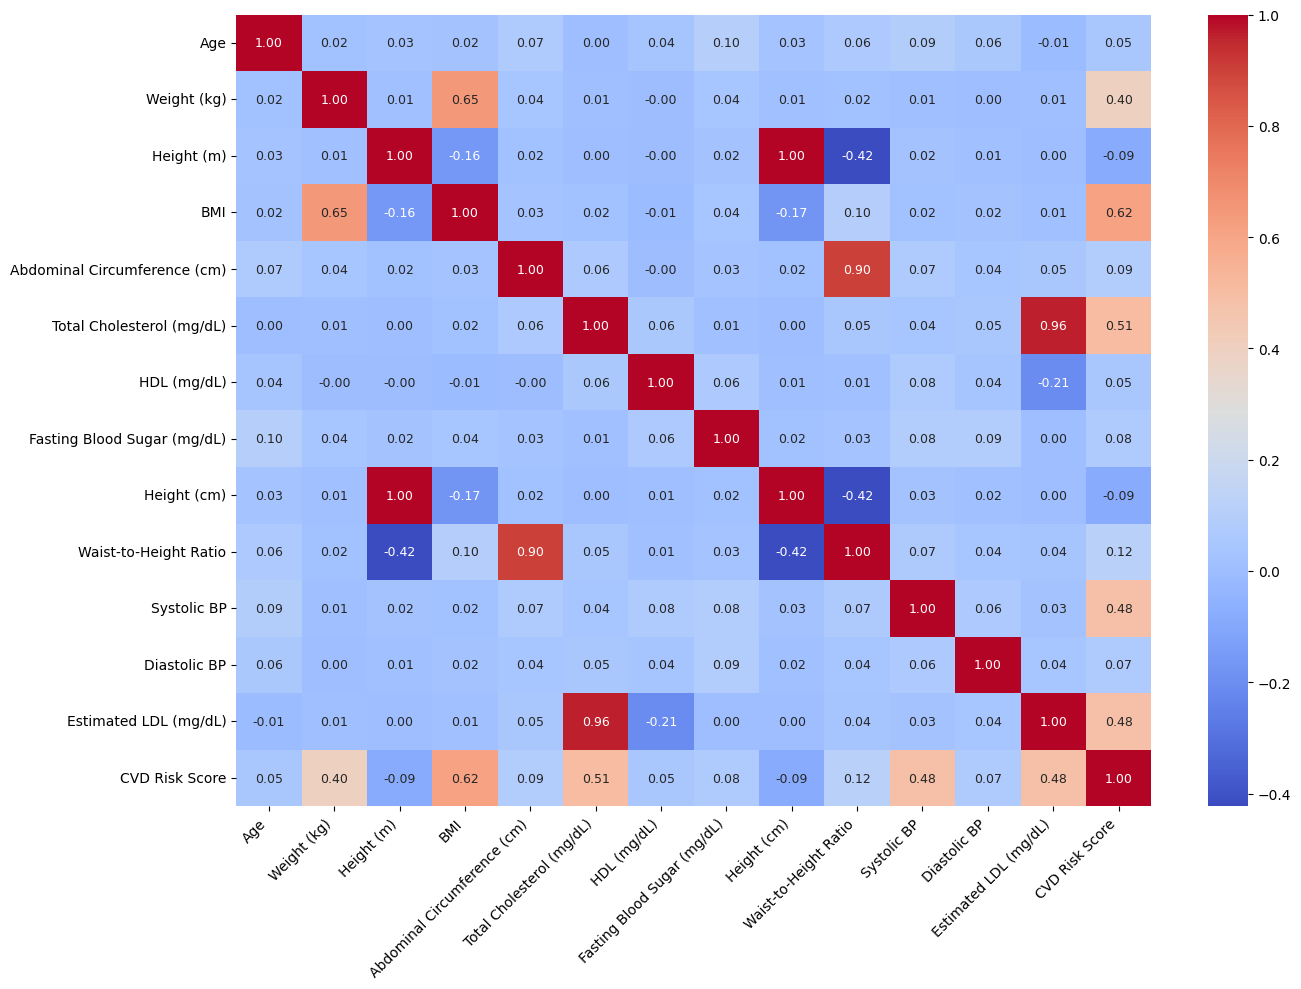

In [49]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlations_of_features,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={'size':9}, annot=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()       
plt.show()

In [50]:
# Height founds twice with Centemeter and Meter matrics 
# Should be removed one, both hold the same Collinearity
# Height(m) might be selected
# I dropped Height(cm)
df.drop(['Height (cm)'], axis=1, inplace=True)
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,SBP,DBP
0,F,32.0,69.1000,1.71,23.6,86.2,248.0,78.0,111.0,N,...,N,INTERMEDIARY,0.504,125.0,79.0,Elevated,140.0,17.93,125,79
1,F,55.0,118.7000,1.69,41.6,82.5,162.0,50.0,135.0,Y,...,Y,HIGH,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,139,70
2,M,46.0,86.6145,1.83,26.9,106.7,103.0,73.0,114.0,N,...,Y,INTERMEDIARY,0.583,104.0,77.0,Normal,0.0,12.64,104,77
3,M,44.0,108.3000,1.80,33.4,96.6,134.0,46.0,91.0,N,...,Y,INTERMEDIARY,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,140,83
4,F,32.0,99.5000,1.86,28.8,102.7,146.0,64.0,141.0,Y,...,N,INTERMEDIARY,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,144,83


In [ ]:
df.to_csv('datasets/clean_cair_cvd_revision_1_3.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'datasets/clean_cair_cvd_revision_1_2.csv'